#### From https://github.com/chenyuntc/pytorch-book.git

## Linear Regression

線性回歸是一種機器學習入門知識，應用十分廣泛的方法。線性回歸利用數理統計中回歸分析，來確定兩種或多種變量之間的相互依賴關係，其表達形式為$ y = wx + b + e $，$ E $為誤差服從均值為0的正態分佈。首先讓我們來確認線性回歸的損失函數：
$$
損失= \ sum_i ^ N \ frac 1 2（{y_i-（wx_i + b）}）^ 2
$$
然後利用隨機梯度梯度下降法更新參數$ \ textbf {w} $和$ \ textbf {b} $來最小化的損失損失函數，最終學得$ \ textbf {w} $和$ \ textbf {b} $的數值。

In [1]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

device = t.device('cpu')

In [13]:
t.manual_seed(1000) 
def get_data(batch_size):
    x = t.rand(batch_size, 1, device=device) * 5
    y = x * 2 + 3 + t.randn(batch_size, 1, device=device)
    return x, y

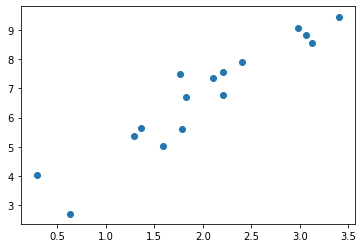

In [16]:
x, y = get_data(batch_size = 16)
plt.scatter(x.squeeze().cpu().numpy(), y.squeeze().cpu().numpy())

In [17]:
print(x)
print(y)

tensor([[1.5947],
        [3.0678],
        [2.2089],
        [1.2902],
        [1.3621],
        [3.1306],
        [2.2050],
        [1.8264],
        [1.7674],
        [2.9857],
        [1.7858],
        [2.4034],
        [2.1083],
        [0.6268],
        [3.4089],
        [0.2857]])
tensor([[5.0145],
        [8.8441],
        [6.7857],
        [5.3750],
        [5.6320],
        [8.5586],
        [7.5593],
        [6.7151],
        [7.4888],
        [9.0805],
        [5.6072],
        [7.9097],
        [7.3502],
        [2.7152],
        [9.4606],
        [4.0324]])


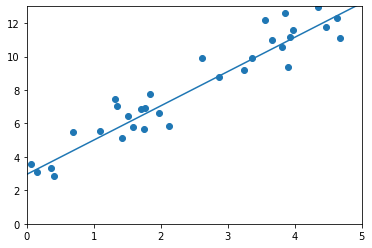

w:  1.904789686203003 b:  2.945845365524292


In [30]:
# Set parameter
w = t.rand(1, 1).to(device)
b = t.zeros(1, 1).to(device)

lr = 0.02

for i in range(500):
    x, y = get_data(batch_size=4)
    # Forward
    y_pred = x.mm(w) + b.expand_as(y) # x@w == x.mm(w)
    loss = 0.5 * (y_pred - y) ** 2 # Mean Square Error
    loss = loss.mean()
    
    # Backward
    dloss = 1
    dy_pred = dloss * (y_pred - y)
    
    dw = x.t().mm(dy_pred)
    db = dy_pred.sum()
    
    # Tune the weight and bias
    w.sub_(lr * dw)
    b.sub_(lr * db)
    
    if i % 50 == 0:
        # Display Plot
        display.clear_output(wait=True)
        x = t.arange(0,6).view(-1,1)
        y = x.float().mm(w) + b.expand_as(x)
        plt.plot(x.cpu().numpy(), y.cpu().numpy()) # predicted
        
        x2, y2 = get_data(batch_size=32) 
        plt.scatter(x2.numpy(), y2.numpy()) # true data
        
        plt.xlim(0, 5)
        plt.ylim(0, 13)
        plt.show()
        plt.pause(0.5)
        
print('w: ', w.item(), 'b: ', b.item())